## Import Libraries and Data

For this project data used Seattle Airbnb data.

1. Do listing price relates to the neighborhood, in which the listing is located?
2. Do review matters?
3. What kinds of Airbnb homes are popular?
4. What are the other features impact the rental price?
5. Can price be accurately predicted based upon these features?

See Data-Cleaning.ipynb for detail on data prep

In [1]:
#import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import ensemble

In [2]:
# read in clean data
airbnb_data_dummies = pd.read_csv('cleaned-listings-dummies.csv')
airbnb_data_list = pd.read_csv('cleaned-listings-base.csv')

### Initial Price Regression

In this section, we take a look at which features correlate with the listing price of an Airbnb. We performed a basic ordinary least squares regression, predicting price using a few dozen variables included in our dataset that we felt may be predictive of price. Variables exluded were either almost entirely NaN, or only contained a single value for >90% of listing

In [3]:
list_reg = 'price ~ host_response_rate + accommodates + guests_included + bathrooms + bedrooms + beds + number_of_reviews + review_scores_rating + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + host_is_superhost + neighbourhood_Ballard  + neighbourhood_Cascade  + neighbourhood_Delridge + neighbourhood_Downtown + neighbourhood_Interbay + neighbourhood_Magnolia + neighbourhood_Northgate + property_type_Apartment  + property_type_Condominium + property_type_House + property_type_Loft + property_type_Townhouse + neighbourhood_Beacon_Hill + neighbourhood_Capitol_Hill + neighbourhood_Central_Area + neighbourhood_Lake_City + neighbourhood_Other_neighborhoods + neighbourhood_Queen_Anne + neighbourhood_Rainier_Valley + neighbourhood_Seward_Park + neighbourhood_University_District + neighbourhood_West_Seattle + property_type_Bed_Breakfast + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room'

Reg_pred = smf.ols(formula=list_reg, data=airbnb_data_dummies).fit()
Reg_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     133.9
Date:                Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                        18:40:34   Log-Likelihood:                -20310.
No. Observations:                3705   AIC:                         4.070e+04
Df Residuals:                    3666   BIC:                         4.094e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           -40.0172     15.600     -2.565      0.010     -70.603      -9.431
host_response_rate                   -0.1522      0.089     -1.702      0.089      -0.327       0.023
accommodates                          7.5136      1.171      6.418      0.000       5.218       9.809
guests_included                       3.3195      0.877      3.784      0.000       1.599       5.040
bathrooms                            27.5206      2.229     12.348      0.000      23.151      31.890
bedrooms                             32.3774      2.044     15.839      0.000      28.370      36.385
beds                                  1.0649      1.777      0.599      0.549      -2.419       4.549
number_of_reviews                    -0.1535      0.028     -5.495      0.000      -0.208      -0.099
review_scores_rating                  0.6975      0.265      2.631      0.009       0.178       1.217
review_scores_accuracy                2.7537      2.037      1.352      0.177      -1.241       6.748
review_scores_cleanliness             2.5100      1.785      1.406      0.160      -0.989       6.009
review_scores_checkin                -0.5466      2.520     -0.217      0.828      -5.487       4.394
review_scores_communication           0.4001      2.704      0.148      0.882      -4.902       5.702
review_scores_location                4.4187      1.964      2.250      0.025       0.568       8.270
review_scores_value                  -8.4369      2.047     -4.121      0.000     -12.451      -4.423
host_is_superhost                     7.1320      2.560      2.786      0.005       2.113      12.152
neighbourhood_Ballard                -6.9845      4.242     -1.646      0.100     -15.302       1.333
neighbourhood_Cascade                24.0184      6.399      3.753      0.000      11.472      36.565
neighbourhood_Delridge              -24.5224      6.539     -3.750      0.000     -37.342     -11.703
neighbourhood_Downtown               33.1323      3.462      9.572      0.000      26.346      39.919
neighbourhood_Interbay                8.4166     17.564      0.479      0.632     -26.019      42.852
neighbourhood_Magnolia               17.1972      7.357      2.338      0.019       2.773      31.621
neighbourhood_Northgate             -30.3488      6.772     -4.481      0.000     -43.626     -17.071
property_type_Apartment             -17.9107      3.740     -4.789      0.000     -25.244     -10.578
property_type_Condominium           -12.6650      6.369     -1.988      0.047     -25.153      -0.177
property_type_House                 -11.3104      3.713     -3.046      0.002     -18.591      -4.030
property_type_Loft                   16.3075      8.597      1.897      0.058      -0.548      33.163
property_type_Townhouse

Overall, our regression had an R-squared of .581, indicating that the variables we have at least explain the majority of variation in listing pricing.

Unsurprisingly, features like bathrooms, bedrooms, and number of guests the listing can accommodate have strong positive relationships with price.

## Exploratory Data Visualizations

### Correlation Heatmap

We first built a heatmap to observe the relationships between variables. The values are squared to see simple correlations rather than including negative correlations.

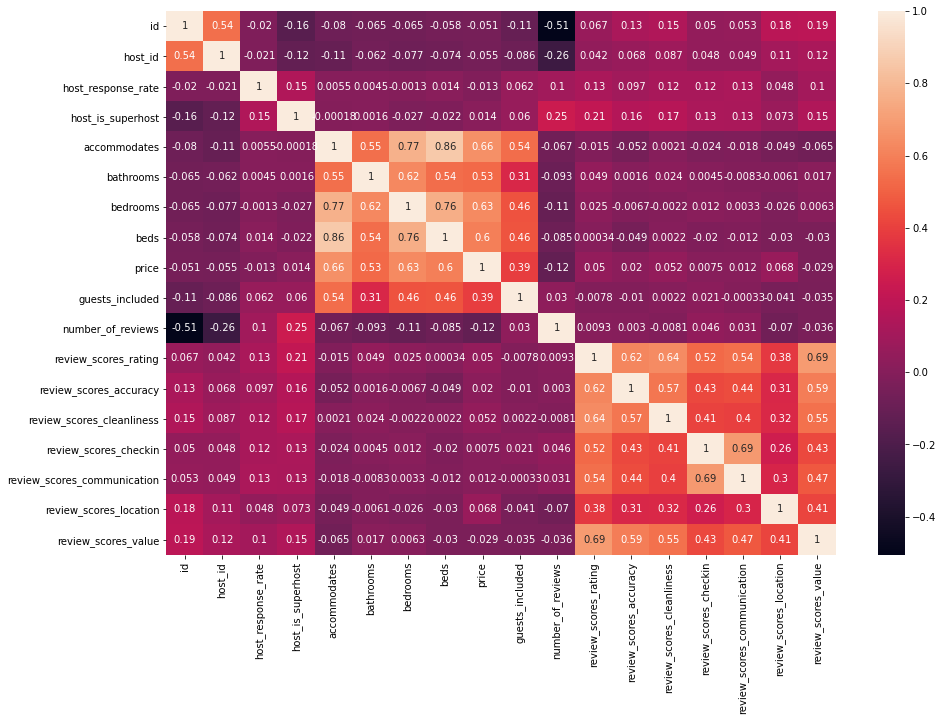

In [4]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(airbnb_data_list.corr(),annot=True, ax = ax);

We are most interested in those that are correlated with price, which include the number of people the listing accomodates and number of bedrooms. It was also interesting to see how each of the review sub-categories (review_scores_location, review_scores_value, etc.) correlated with each other. It looks like review_scores_cleanliness and review_scores_value are the most correlated of the different sub-ratings.

## Listing Prices Overview

High level overview of the prices:

In [4]:
#find minimum, maximum and average price for listing
min_price = airbnb_data_list['price'].min()
max_price = airbnb_data_list['price'].max()
mean_price = airbnb_data_list['price'].mean()

print('Minimum price per listing is %d USD.' % (min_price))
print('Maximum price per listing is %d USD.' % (max_price))
print('Average price per listing is %d USD.' % (mean_price))

Minimum price per listing is 20 USD.
Maximum price per listing is 1000 USD.
Average price per listing is 128 USD.


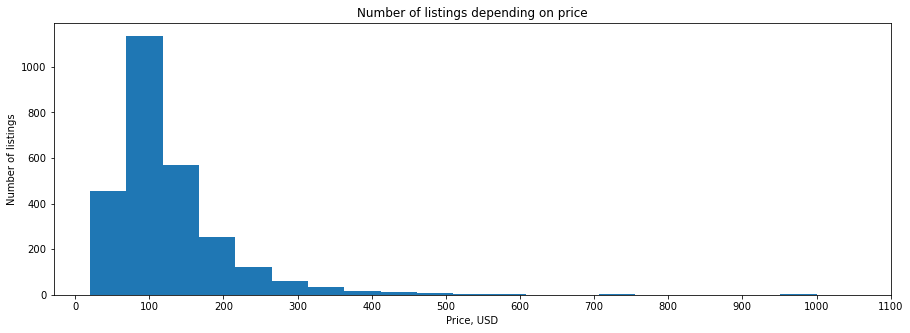

In [5]:
#get the average price for each listing
mean_price_for_listing = airbnb_data_list.groupby('host_id').mean()['price']

#plot
plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1200, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, USD')
plt.title('Number of listings depending on price')


plt.savefig('Price distrubution.png')

plt.show()

Now we see the distribution of average listing prices. The majority of listings is concentrated around 50 - 180 USD.

## Property Type and Price

What kinds of Airbnb homes/property types are popular?

We then took a look at the relationship between the property type of the listing against the average price of the listing in that neighborhood.

Text(0, 0.5, 'Average Price (USD)')

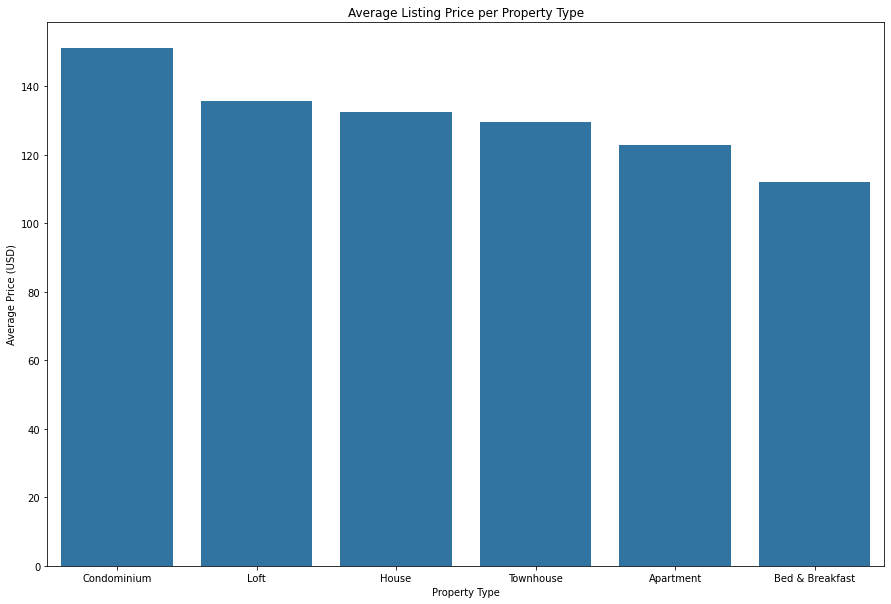

In [6]:
# neighborhood average price comparison 
plt.figure(figsize=(15,10))
base_color = sns.color_palette()[0]
prices_by_property_type = airbnb_data_list.groupby(['property_type']).mean().price.sort_values(ascending=False)
prices_by_property_type_df = pd.DataFrame(prices_by_property_type)
prices_by_property_type_df = prices_by_property_type_df.reset_index()
sns.barplot(y="price", x="property_type", data=prices_by_property_type_df,color = base_color)
plt.title("Average Listing Price per Property Type")
plt.xlabel("Property Type")
plt.ylabel("Average Price (USD)")

## Neighborhood and Price

Do listing price relates to the neighborhood, in which the listing is located?

We then took a look at the relationship between the neighborhood of the listing against the average price of the listing in that neighborhood.

Text(0, 0.5, 'Average Price (USD)')

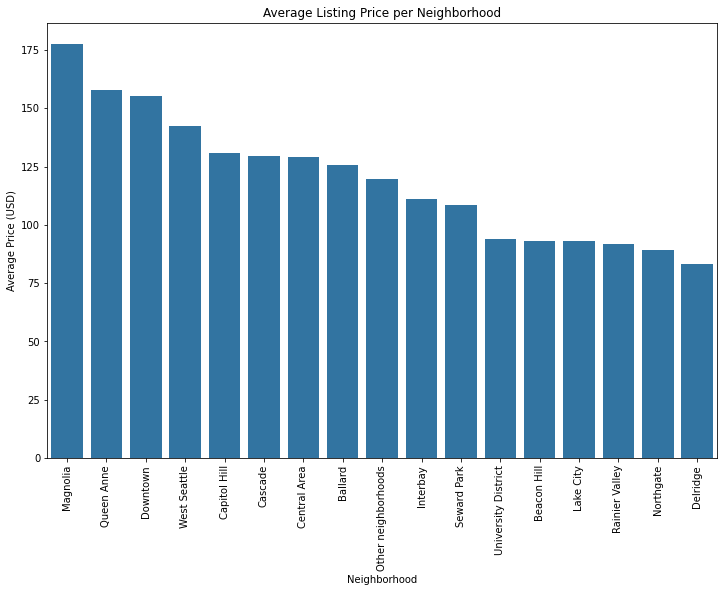

In [7]:
# neighborhood average price comparison 
plt.figure(figsize=(12,8))
base_color = sns.color_palette()[0]
prices_by_neighbourhood = airbnb_data_list.groupby(['neighbourhood']).mean().price.sort_values(ascending=False)
neighbourhood_prices_df = pd.DataFrame(prices_by_neighbourhood)
neighbourhood_prices_df = neighbourhood_prices_df.reset_index()
sns.barplot(x="neighbourhood",y="price", data=neighbourhood_prices_df,color = base_color)
plt.xticks(rotation = 90)
plt.title("Average Listing Price per Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Price (USD)")

**Magnolia** stands out from the group with an average price of nearly 175 dollars, nearly 100 dollars more than the lowest average of Delridge at around 75 dollars per listing.

## Number of Reviews

Do reviews does any impact on price?
Lets do comparison between listing price and the number of reviews.

In [8]:
#Only explore listings with more than 3 reviews
review_data = airbnb_data_dummies[airbnb_data_dummies.number_of_reviews > 3]

## Airbnb Rating Regression

In [9]:
host_ratng = 'review_scores_rating ~ host_response_rate + accommodates + guests_included + bathrooms + bedrooms + beds + number_of_reviews + price + review_scores_accuracy + review_scores_cleanliness + review_scores_checkin + review_scores_communication + review_scores_location + review_scores_value + host_is_superhost + neighbourhood_Ballard  + neighbourhood_Cascade  + neighbourhood_Delridge + neighbourhood_Downtown + neighbourhood_Interbay + neighbourhood_Magnolia + neighbourhood_Northgate + property_type_Apartment  + property_type_Condominium + property_type_House + property_type_Loft + property_type_Townhouse + neighbourhood_Beacon_Hill + neighbourhood_Capitol_Hill + neighbourhood_Central_Area + neighbourhood_Lake_City + neighbourhood_Other_neighborhoods + neighbourhood_Queen_Anne + neighbourhood_Rainier_Valley + neighbourhood_Seward_Park + neighbourhood_University_District + neighbourhood_West_Seattle + property_type_Bed_Breakfast + room_type_Entire_home_apt + room_type_Private_room + room_type_Shared_room'

df_ratng = smf.ols(formula=host_ratng, data=review_data).fit()
df_ratng.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     review_scores_rating   R-squared:                       0.719
Model:                              OLS   Adj. R-squared:                  0.715
Method:                   Least Squares   F-statistic:                     160.7
Date:                  Fri, 18 Sep 2020   Prob (F-statistic):               0.00
Time:                          18:41:33   Log-Likelihood:                -5878.2
No. Observations:                  2424   AIC:                         1.183e+04
Df Residuals:                      2385   BIC:                         1.206e+04
Df Model:                            38                                         
Covariance Type:              nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.4947      1.052     -0.470      0.638      -2.557       1.568
host_response_rate                    0.0064      0.006      1.128      0.260      -0.005       0.018
accommodates                         -0.0249      0.071     -0.353      0.724      -0.163       0.114
guests_included                      -0.0544      0.054     -1.007      0.314      -0.160       0.052
bathrooms                             0.1837      0.133      1.379      0.168      -0.077       0.445
bedrooms                              0.0582      0.128      0.456      0.648      -0.192       0.308
beds                                 -0.0540      0.105     -0.513      0.608      -0.261       0.153
number_of_reviews                    -0.0028      0.001     -1.999      0.046      -0.006   -5.38e-05
price                                 0.0036      0.001      3.474      0.001       0.002       0.006
review_scores_accuracy                1.6423      0.135     12.149      0.000       1.377       1.907
review_scores_cleanliness             2.0050      0.108     18.523      0.000       1.793       2.217
review_scores_checkin                 1.3617      0.169      8.073      0.000       1.031       1.693
review_scores_communication           1.7527      0.177      9.930      0.000       1.407       2.099
review_scores_location                0.9312      0.120      7.782      0.000       0.697       1.166
review_scores_value                   2.1203      0.125     16.977      0.000       1.875       2.365
host_is_superhost                     0.6915      0.136      5.085      0.000       0.425       0.958
neighbourhood_Ballard                -0.4465      0.243     -1.840      0.066      -0.922       0.029
neighbourhood_Cascade                 0.1534      0.411      0.374      0.709      -0.652       0.959
neighbourhood_Delridge                0.5707      0.379      1.505      0.133      -0.173       1.315
neighbourhood_Downtown                0.0233      0.211      0.110      0.912      -0.390       0.437
neighbourhood_Interbay                1.2777      1.069      1.195      0.232      -0.818       3.374
neighbourhood_Magnolia               -0.1886      0.464     -0.406      0.685      -1.099       0.722
neighbourhood_Northgate              -0.6410      0.421     -1.522      0.128      -1.467       0.185
property_type_Apartment              -0.3262      0.242     -1.348      0.178      -0.801       0.148
property_type_Condominium            -0.1307      0.436     -0.300      0.764      -0.986       0.724
property_type_House                  -0.2324      0.241     -0.963      0.336      -0.706       0.241
property_type_Loft                   -0.3489      0.531     -0.657      0.511      -1.391       0.693
p

These results were a bit conflicting. While we yielded an R-squared of .719, checking the variables of significance reveal that this is almost entirely due to the sub-scores that are contained in our dataset.

On Airbnb, there is both an overall rating represented by our dependent variable review_scores_rating, as well as several sub-ratings that we touched on earlier. Because using sub-scores to predict an overall score feels a bit lazy, we decided to test out predictive abilities both with and without those sub-scores included.

With that being said, a few additional variables did, in fact, have a significant relationship to the overall rating, such as price, the number of reviews (surprisingly this was a negative relationship), and whether or not the host was an Airbnb "superhost".

## Regression Without Review

Unsurprisingly, this tanked our R-squared value, now residing at .190, indicating that our remaining variables only account for 20% of the variation in Airbnb rating. We hypothesized that this is because the variables we are left with only represent a small fraction of what goes into a positive or negative Airbnb experience. We are simply using detials like the property type, neighborhood, and price to explain a rating.

The bright side is that many of these are, in fact, significant, and provide us with some insight into what contributes to positive or negative scores.

A few interesting relationships are price, with a positive relationship to rating, indicating that more expensive Airbnbs generally have higher overall ratings. host_is_superhost has a positive relationship with rating, a relationship that makes sense intuitively, as better, more experienced hosts perhaps provide better experiences to renters.

## Other features can influence Price 

What are the other features impact the rental price?

It is useful to look on correlations between price and other features from the dataset to find factors, which influence the price.

In [10]:
#Numerical columns to find out correlation
corr = airbnb_data_list[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'price']].corr()
corr.style.background_gradient(cmap='coolwarm')

,accommodates,bathrooms,bedrooms,beds,guests_included,price
accommodates,1.000000,0.546563,0.774591,0.863987,0.536000,0.655767
bathrooms,0.546563,1.000000,0.624763,0.536612,0.309513,0.528873
bedrooms,0.774591,0.624763,1.000000,0.764150,0.456190,0.631540
beds,0.863987,0.536612,0.764150,1.000000,0.464313,0.597559
guests_included,0.536000,0.309513,0.456190,0.464313,1.000000,0.389283
price,0.655767,0.528873,0.631540,0.597559,0.389283,1.000000


From the correlations heatmap diagram we can see that price is correlated with number of accomodates, bathrooms, bedrooms and beds. We also see that these features are correlated themselves. In fact, these results are quite obvious, because the price really depends on how large is the place.

## Predicting Price

After exploring our variables, we began our efforts to predict price.

In [11]:

# split into train and test
train_X =  airbnb_data_dummies.drop("price", axis=1)
train_y = airbnb_data_dummies.price
X_train, X_test, y_train, y_test = train_test_split(train_X,train_y,test_size = 0.2, random_state = 42)


In [12]:
lm_model = LinearRegression(normalize=True) # Instantiate
# Fit the selected model
lm_model.fit(X_train, y_train)
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# Calculate the r2 score, MAE, and MSE for the training data
r2_score_train_1=r2_score(y_train, y_train_preds)
mae_train=mean_absolute_error(y_train, y_train_preds)
mse_train=mean_squared_error(y_train, y_train_preds)

# Calculate the r2 score, MAE, and MSE for the test data
R_score=r2_score(y_test, y_test_preds)
mae_test=mean_absolute_error(y_test, y_test_preds)
mse_test=mean_squared_error(y_train, y_train_preds)
print("TRAINING:LINEAR_REGRESSION  model,the  r-squared={:.3f}, mae={:.3f}, mse={:.3f} on {} values.".format(r2_score_train_1, mae_train, mse_train, len(y_train)))
#"TESTING:The r-squared score for the LINEAR_REGRESSION  model was {} on {} values.".format(R_score, len(y_test))
"TESTING:LINEAR_REGRESSION  model,the  r-squared={:.3f}, mae={:.3f}, mse={:.3f} on {} values.".format(R_score, mae_test, mse_test, len(y_test))

TRAINING:LINEAR_REGRESSION  model,the  r-squared=0.580, mae=35.065, mse=3384.046 on 2964 values.


'TESTING:LINEAR_REGRESSION  model,the  r-squared=0.587, mae=35.063, mse=3384.046 on 741 values.'

In [13]:
lm_model=ensemble.RandomForestRegressor(n_estimators=350,criterion='mse',random_state=21,n_jobs=-1)
# Fit the selected model
lm_model.fit(X_train, y_train) 
# Predict and score the model 
y_test_preds_1 = lm_model.predict(X_test) 
y_train_preds_1 = lm_model.predict(X_train)
    
# Calculate the r2 score, MAE, and MSE for the training data
r2_score_train=r2_score(y_train, y_train_preds_1)
mae_train=mean_absolute_error(y_train, y_train_preds_1)
mse_train=mean_squared_error(y_train, y_train_preds_1)
    
# Calculate the r2 score, MAE, and MSE for the test data
r2_score_test=r2_score(y_test, y_test_preds_1)
mae_test=mean_absolute_error(y_test, y_test_preds_1)
mse_test=mean_squared_error(y_train, y_train_preds_1)

print("TRAINING:RANDOM_FOREST_REGRESSOR  model,the  r-squared={:.3f}, mae={:.3f}, mse={:.3f} on {} values.".format(r2_score_train, mae_train, mse_train, len(y_train)))
#"'TESTING:The r-squared score for the RANDOM_FOREST_REGRESSOR  model was {} on {} values.".format(r2_score_test, len(y_test))
"TESTING:RANDOM_FOREST_REGRESSOR  model ,The r-squared={:.3f}, mae={:.3f}, mse={:.3f} on {} values.".format(r2_score_test, mae_test, mse_test, len(y_test))

TRAINING:RANDOM_FOREST_REGRESSOR  model,the  r-squared=0.939, mae=12.617, mse=488.970 on 2964 values.


'TESTING:RANDOM_FOREST_REGRESSOR  model ,The r-squared=0.555, mae=33.652, mse=488.970 on 741 values.'

### Visualizing Pricing Predictions

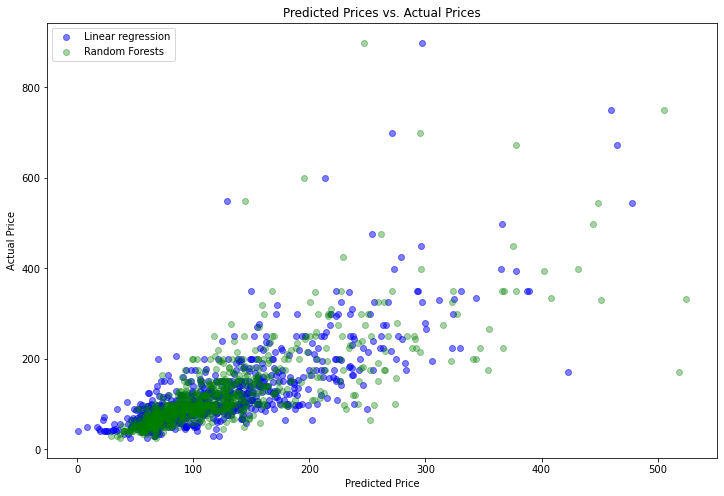

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(y_test_preds,y_test,color='b', alpha = .5, label = 'Linear regression')
plt.scatter(y_test_preds_1,y_test,color='g', alpha = .35, label = 'Random Forests')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.legend(loc='upper left')
plt.title("Predicted Prices vs. Actual Prices")

plt.show()

The figure above is a visualization of our predicted prices through both the Random Forests and linear Regression methods, our two best performing models.Predictions from both models look quite similar.

## Visualizing Predictive Error

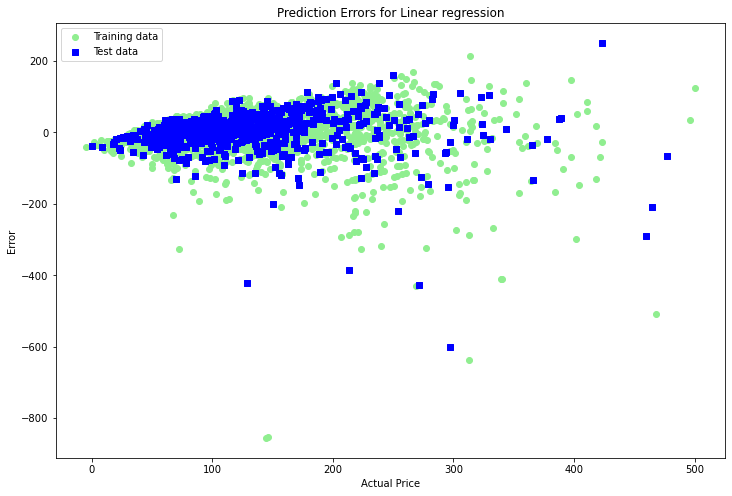

In [15]:

plt.figure(figsize=(12,8))
plt.scatter(y_train_preds,  y_train_preds - y_train,color='lightgreen', marker='o', label='Training data')
plt.scatter(y_test_preds,  y_test_preds - y_test,color='blue', marker='s', label='Test data')
plt.xlabel('Actual Price')
plt.ylabel('Error')
plt.title("Prediction Errors for Linear regression")
plt.legend(loc='upper left')
plt.show()

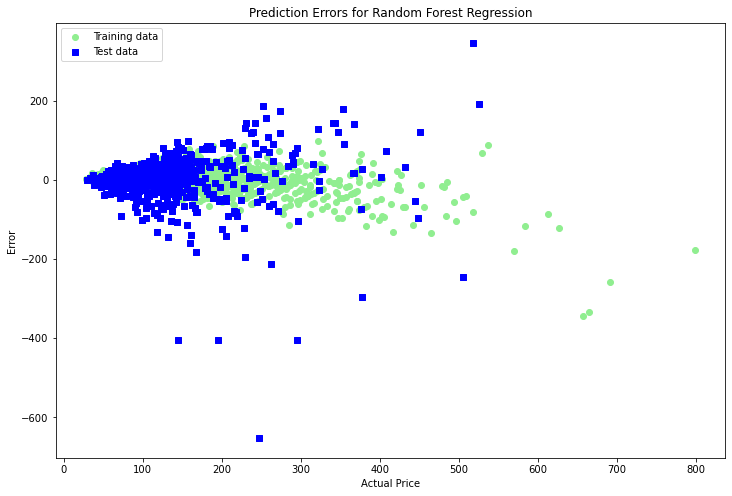

In [16]:
plt.figure(figsize=(12,8))
#plt.scatter(test_outcome,test_outcome - nn_grid.predict(test_features),color='b', alpha = .5, label = 'Linear regression')
#plt.scatter(test_outcome,test_outcome - rf_grid.predict(test_features),color='g', alpha = .35, label = 'Random Forests')
plt.scatter(y_train_preds_1,  y_train_preds_1 - y_train,color='lightgreen', marker='o', label='Training data')
plt.scatter(y_test_preds_1,  y_test_preds_1 - y_test,color='blue', marker='s', label='Test data')

plt.xlabel('Actual Price')
plt.ylabel('Error')
plt.title("Prediction Errors for Random Forest Regression")
plt.legend(loc='upper left')
plt.show()

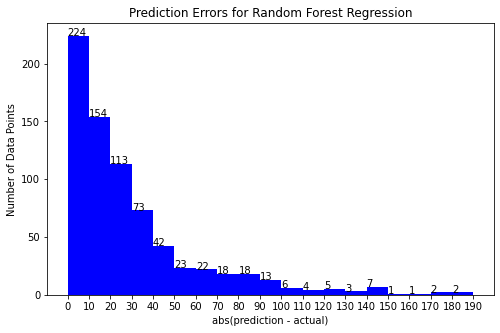

In [17]:
bin_range = np.arange(0.0,200.0,10.0,dtype=np.float32)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)    
arr = plt.hist(abs(y_test_preds_1 - y_test),bin_range,color='blue') 
your_bins=19
    
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],'{0:.0f}'.format(arr[0][i]))
    
plt.title("Prediction Errors for Random Forest Regression")
plt.ylabel('Number of Data Points')
plt.xlabel('abs(prediction - actual)')
plt.xticks(bin_range)
plt.show()

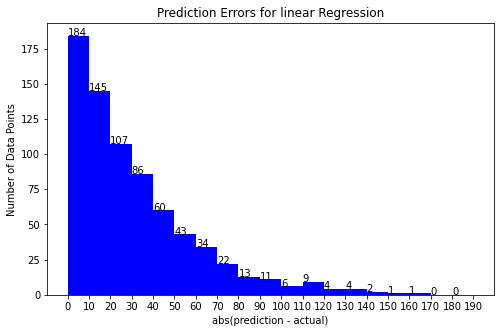

In [18]:
bin_range = np.arange(0.0,200.0,10.0,dtype=np.float32)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)    
arr = plt.hist(abs(y_test_preds - y_test),bin_range,color='blue') 
your_bins=19
    
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],'{0:.0f}'.format(arr[0][i]))
    
plt.title("Prediction Errors for linear Regression")
plt.ylabel('Number of Data Points')
plt.xlabel('abs(prediction - actual)')
plt.xticks(bin_range)
plt.show()